# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Check API key imported correctly
print(api_key)


c8a83ab3981a0a6edd35ae9040496850


## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#cities = cities[0:900]
len(cities)

621

In [13]:
cities_dataframe = pd.DataFrame({'city_list': cities})

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# Create URl and temp metrics
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [15]:
# Create empty DF to hold data
column_names = ('City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed')
cities_df = pd.DataFrame(columns=column_names)
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [16]:
# Iterate through list of cities and extract working 
record = 1
city_count = 1

print("Beginning Data Retrieval")

for index,row in cities_dataframe.iterrows():
    city_use = row['city_list']
    url = "http://api.openweathermap.org/data/2.5/weather?"
    city_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + city_use
    data = requests.get(city_url).json()
    try:
        cities_df.set_value(index, 'City', data['name'])
        cities_df.set_value(index, 'Lat', data['coord']["lat"])
        cities_df.set_value(index, 'Lng', data['coord']['lon'])
        cities_df.set_value(index, 'Country', data['sys']['country'])
        cities_df.set_value(index, 'Cloudiness', data['clouds']['all'])
        cities_df.set_value(index, 'Max Temp', data['main']['temp'])
        cities_df.set_value(index, 'Wind Speed', data['wind']['speed'])
        cities_df.set_value(index, 'Date', data['dt'])
        cities_df.set_value(index, 'Humidity', data['main']['humidity'])
        
        print(f"Processing Record of {record} of Set {city_count} | {data['name']}")
        
        record += 1
    except:
        print("city not found")
    if record == 45:
              time.sleep(random.randint(1, 4))  
              record = 1
              city_count += 1

print("Data Retrieval Complete")

Beginning Data Retrieval
Processing Record of 1 of Set 1 | Balkanabat


C:\Users\amand\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\amand\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\amand\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\amand\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\amand\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a f

Processing Record of 2 of Set 1 | Hilo
Processing Record of 3 of Set 1 | Jamestown
city not found
Processing Record of 4 of Set 1 | Pokhara
Processing Record of 5 of Set 1 | Saint-Joseph
Processing Record of 6 of Set 1 | Rio Brilhante
Processing Record of 7 of Set 1 | Rafaela
Processing Record of 8 of Set 1 | Kendari
city not found
Processing Record of 9 of Set 1 | Saint-Francois
Processing Record of 10 of Set 1 | Fortuna
Processing Record of 11 of Set 1 | Faanui
Processing Record of 12 of Set 1 | Durango
Processing Record of 13 of Set 1 | Port Alfred
Processing Record of 14 of Set 1 | Avarua
Processing Record of 15 of Set 1 | Ushuaia
Processing Record of 16 of Set 1 | Bredasdorp
Processing Record of 17 of Set 1 | Korem
Processing Record of 18 of Set 1 | Thompson
Processing Record of 19 of Set 1 | Providencia
Processing Record of 20 of Set 1 | Busselton
Processing Record of 21 of Set 1 | Clinton
Processing Record of 22 of Set 1 | Miles City
Processing Record of 23 of Set 1 | Nalut
city

Processing Record of 4 of Set 5 | San Patricio
Processing Record of 5 of Set 5 | Punta de Piedra
Processing Record of 6 of Set 5 | Kenai
Processing Record of 7 of Set 5 | Bafq
Processing Record of 8 of Set 5 | Aswan
Processing Record of 9 of Set 5 | Mandiana
Processing Record of 10 of Set 5 | Raton
Processing Record of 11 of Set 5 | Louis Trichardt
Processing Record of 12 of Set 5 | Egvekinot
Processing Record of 13 of Set 5 | Bama
Processing Record of 14 of Set 5 | Marsh Harbour
Processing Record of 15 of Set 5 | Broken Hill
Processing Record of 16 of Set 5 | Matara
Processing Record of 17 of Set 5 | Pangnirtung
Processing Record of 18 of Set 5 | Vila Velha
Processing Record of 19 of Set 5 | Okulovka
Processing Record of 20 of Set 5 | Buraydah
Processing Record of 21 of Set 5 | Padang
Processing Record of 22 of Set 5 | Marystown
Processing Record of 23 of Set 5 | Ribeira Grande
Processing Record of 24 of Set 5 | San Quintin
Processing Record of 25 of Set 5 | Bantou
city not found
Proc

Processing Record of 8 of Set 9 | Dubrovnik
city not found
Processing Record of 9 of Set 9 | Hare Bay
Processing Record of 10 of Set 9 | Komsomolskiy
Processing Record of 11 of Set 9 | Sheridan
Processing Record of 12 of Set 9 | Antonina
Processing Record of 13 of Set 9 | Enkoping
Processing Record of 14 of Set 9 | Gigmoto
city not found
Processing Record of 15 of Set 9 | Karaidel
Processing Record of 16 of Set 9 | Jizan
Processing Record of 17 of Set 9 | Indiaroba
Processing Record of 18 of Set 9 | College
Processing Record of 19 of Set 9 | Kasaoka
Processing Record of 20 of Set 9 | Amberley
Processing Record of 21 of Set 9 | Rio Grande
city not found
Processing Record of 22 of Set 9 | Ginir
Processing Record of 23 of Set 9 | Gidole
Processing Record of 24 of Set 9 | Buchanan
Processing Record of 25 of Set 9 | Abu Dhabi
Processing Record of 26 of Set 9 | Pontes e Lacerda
Processing Record of 27 of Set 9 | Port Blair
Processing Record of 28 of Set 9 | Muncar
city not found
Processing R

Processing Record of 8 of Set 13 | Taoudenni
Processing Record of 9 of Set 13 | Obala
Processing Record of 10 of Set 13 | Maniago
Processing Record of 11 of Set 13 | Megion
Processing Record of 12 of Set 13 | Kailua
Processing Record of 13 of Set 13 | Mina
Processing Record of 14 of Set 13 | Kitimat
Processing Record of 15 of Set 13 | Chauk
Processing Record of 16 of Set 13 | Ambon
Processing Record of 17 of Set 13 | Merauke
Processing Record of 18 of Set 13 | Camacupa
Processing Record of 19 of Set 13 | Apastovo
Processing Record of 20 of Set 13 | Weymouth
Processing Record of 21 of Set 13 | Saint-Pierre
Processing Record of 22 of Set 13 | Songea
Processing Record of 23 of Set 13 | Pucallpa
Processing Record of 24 of Set 13 | Rivne
Data Retrieval Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
cities_df.count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lng           552
Max Temp      552
Wind Speed    552
dtype: int64

In [39]:
# Save the DataFrame as a csv
cities_df.to_csv("output_data/weatherpy_data.csv", encoding="utf-8", index=False)
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Balkanabat,80,TM,1545694687,91,39.51,54.36,30.36,2.35
1,Hilo,90,US,1545691980,84,19.71,-155.08,75.02,11.41
2,Jamestown,0,AU,1545694609,16,-33.21,138.6,91.15,9.62
4,Pokhara,0,NP,1545694688,56,28.21,83.99,29.73,2.57
5,Saint-Joseph,0,FR,1545692400,100,43.56,6.97,44.6,2.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

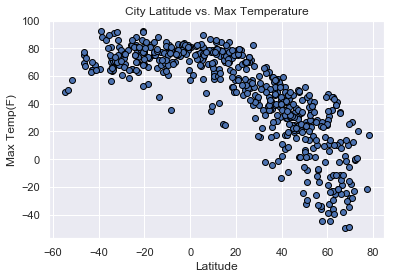

In [58]:
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], edgecolors='black');
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude');
plt.ylabel('Max Temp(F)');

# Save the figure
plt.savefig("output_data/lat_v_temp.png")

#### Latitude vs. Humidity Plot

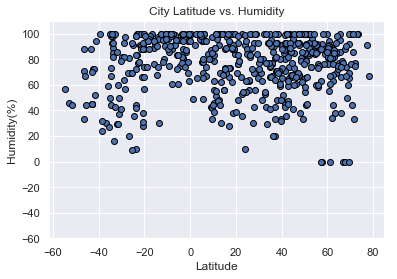

In [59]:
plt.ylim(-60, 110)

plt.scatter(cities_df["Lat"], cities_df["Humidity"], edgecolors='black');
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude');
plt.ylabel('Humidity(%)');

# Save the figure
plt.savefig("output_data/lat_v_humidity.png")

#### Latitude vs. Cloudiness Plot

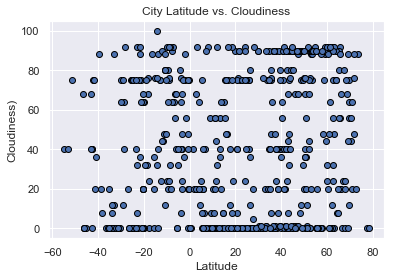

In [60]:
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], edgecolors='black');
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude');
plt.ylabel('Cloudiness)');

# Save the figure
plt.savefig("output_data/lat_v_cloudiness.png")

#### Latitude vs. Wind Speed Plot

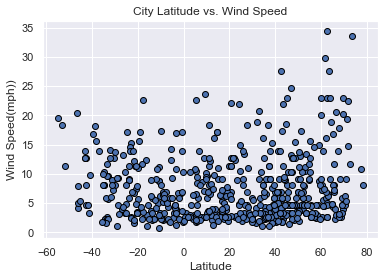

In [61]:
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], edgecolors='black');
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude');
plt.ylabel('Wind Speed(mph))');

# Save the figure
plt.savefig("output_data/lat_v_wind.png")